In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv", sep = ",")

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

# EDA

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

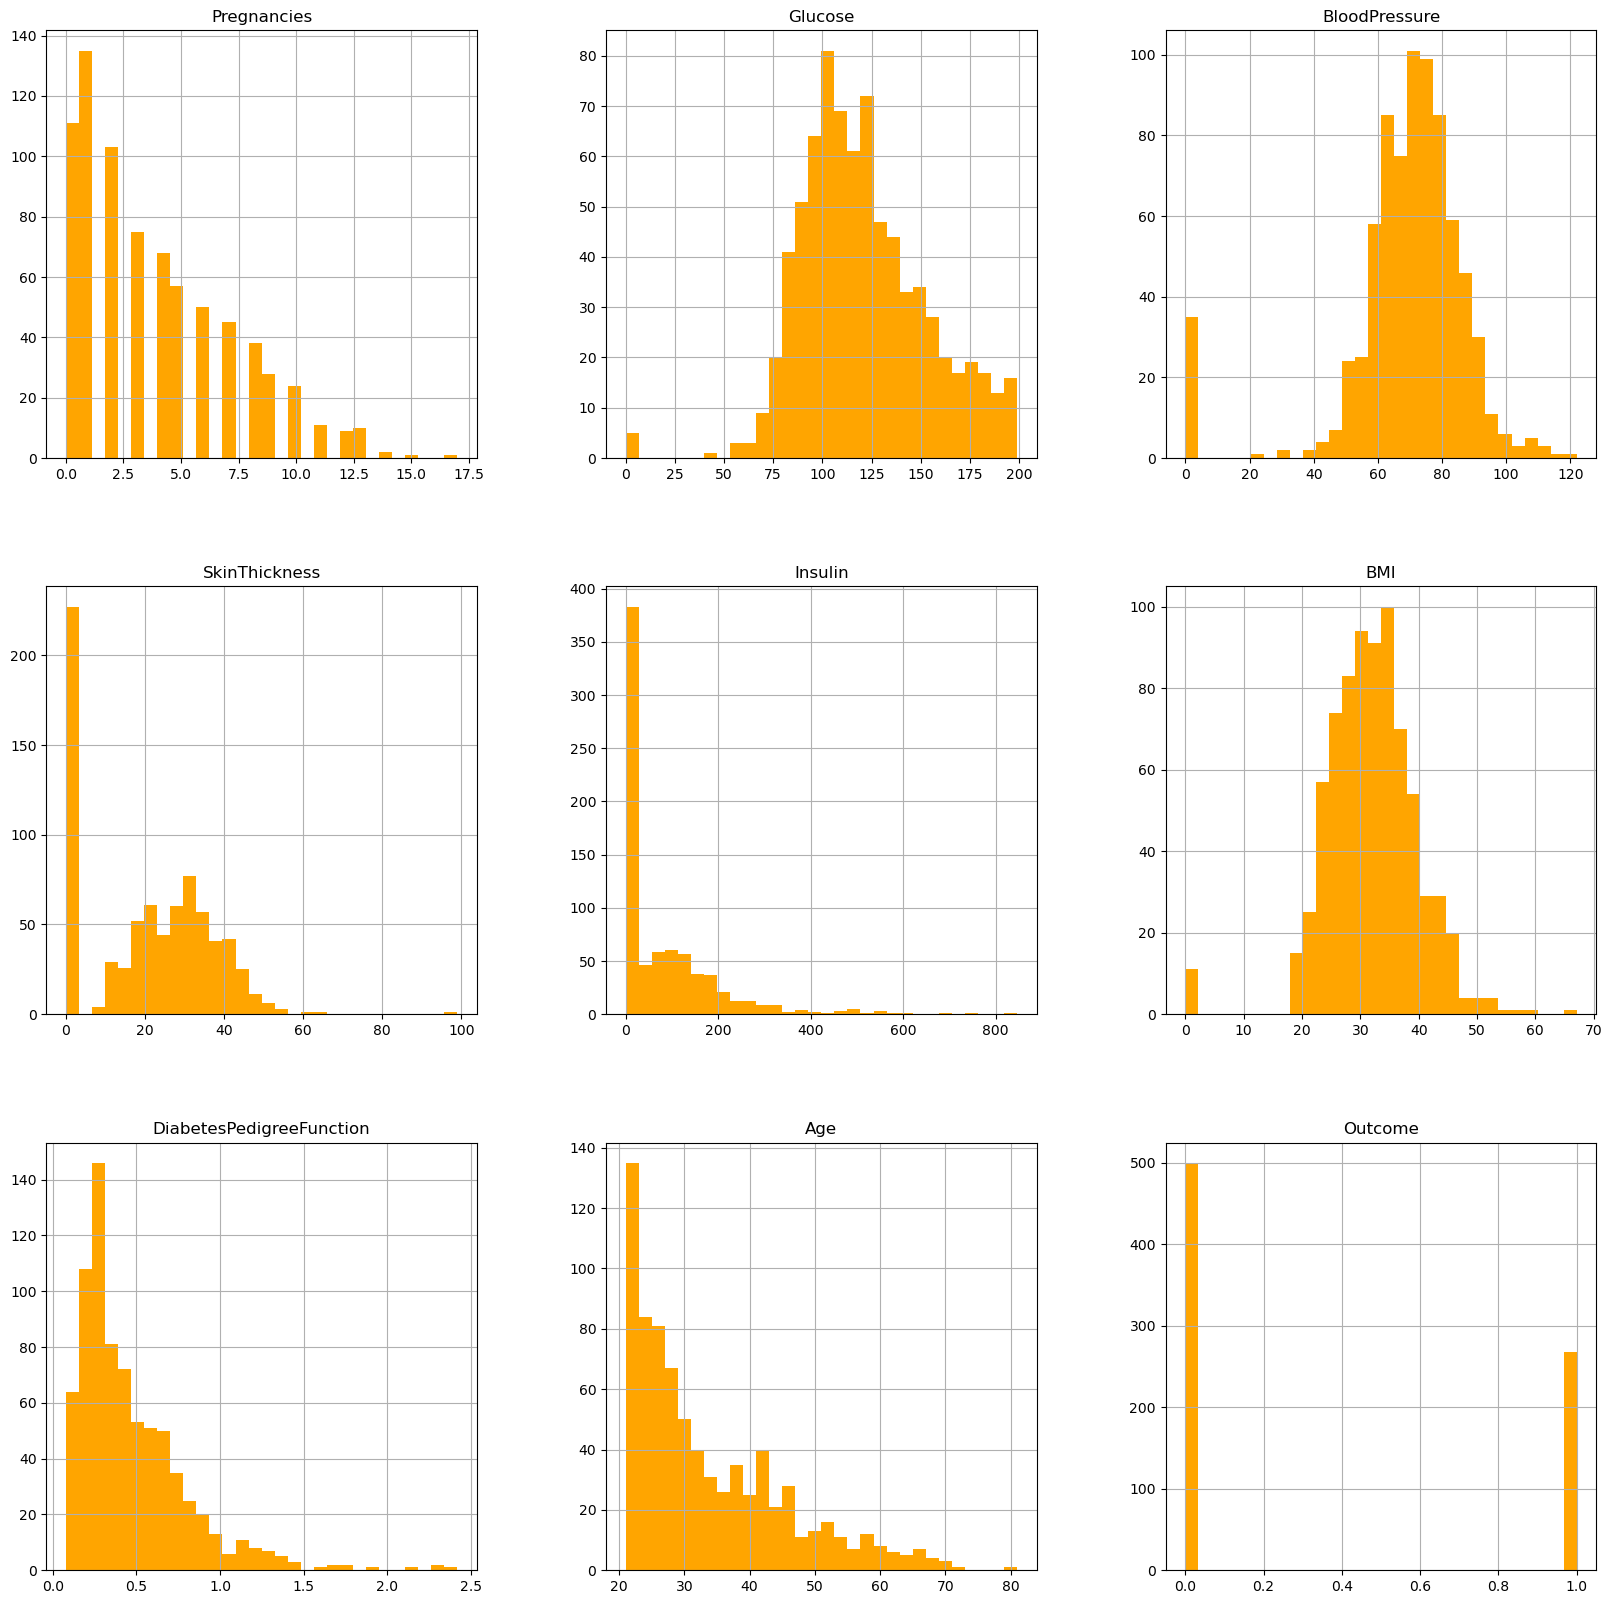

In [5]:
df.hist(bins = 30, figsize = (20, 20), color = 'orange')

plt.show()

Insights from the histograms:

* There are more young study participants.
* The zero values in the skin thickness field indicate that the collagen level was not measured for all patients. 
* Similarly, zero values for glucose, blood presure, and bmi indicate missing measurements. A glucose level of zero would mean the patient is in a coma or worse.
* There are about twice as many patients without diabetes (outcome = 0) than with diabetes (outcome = 1) 

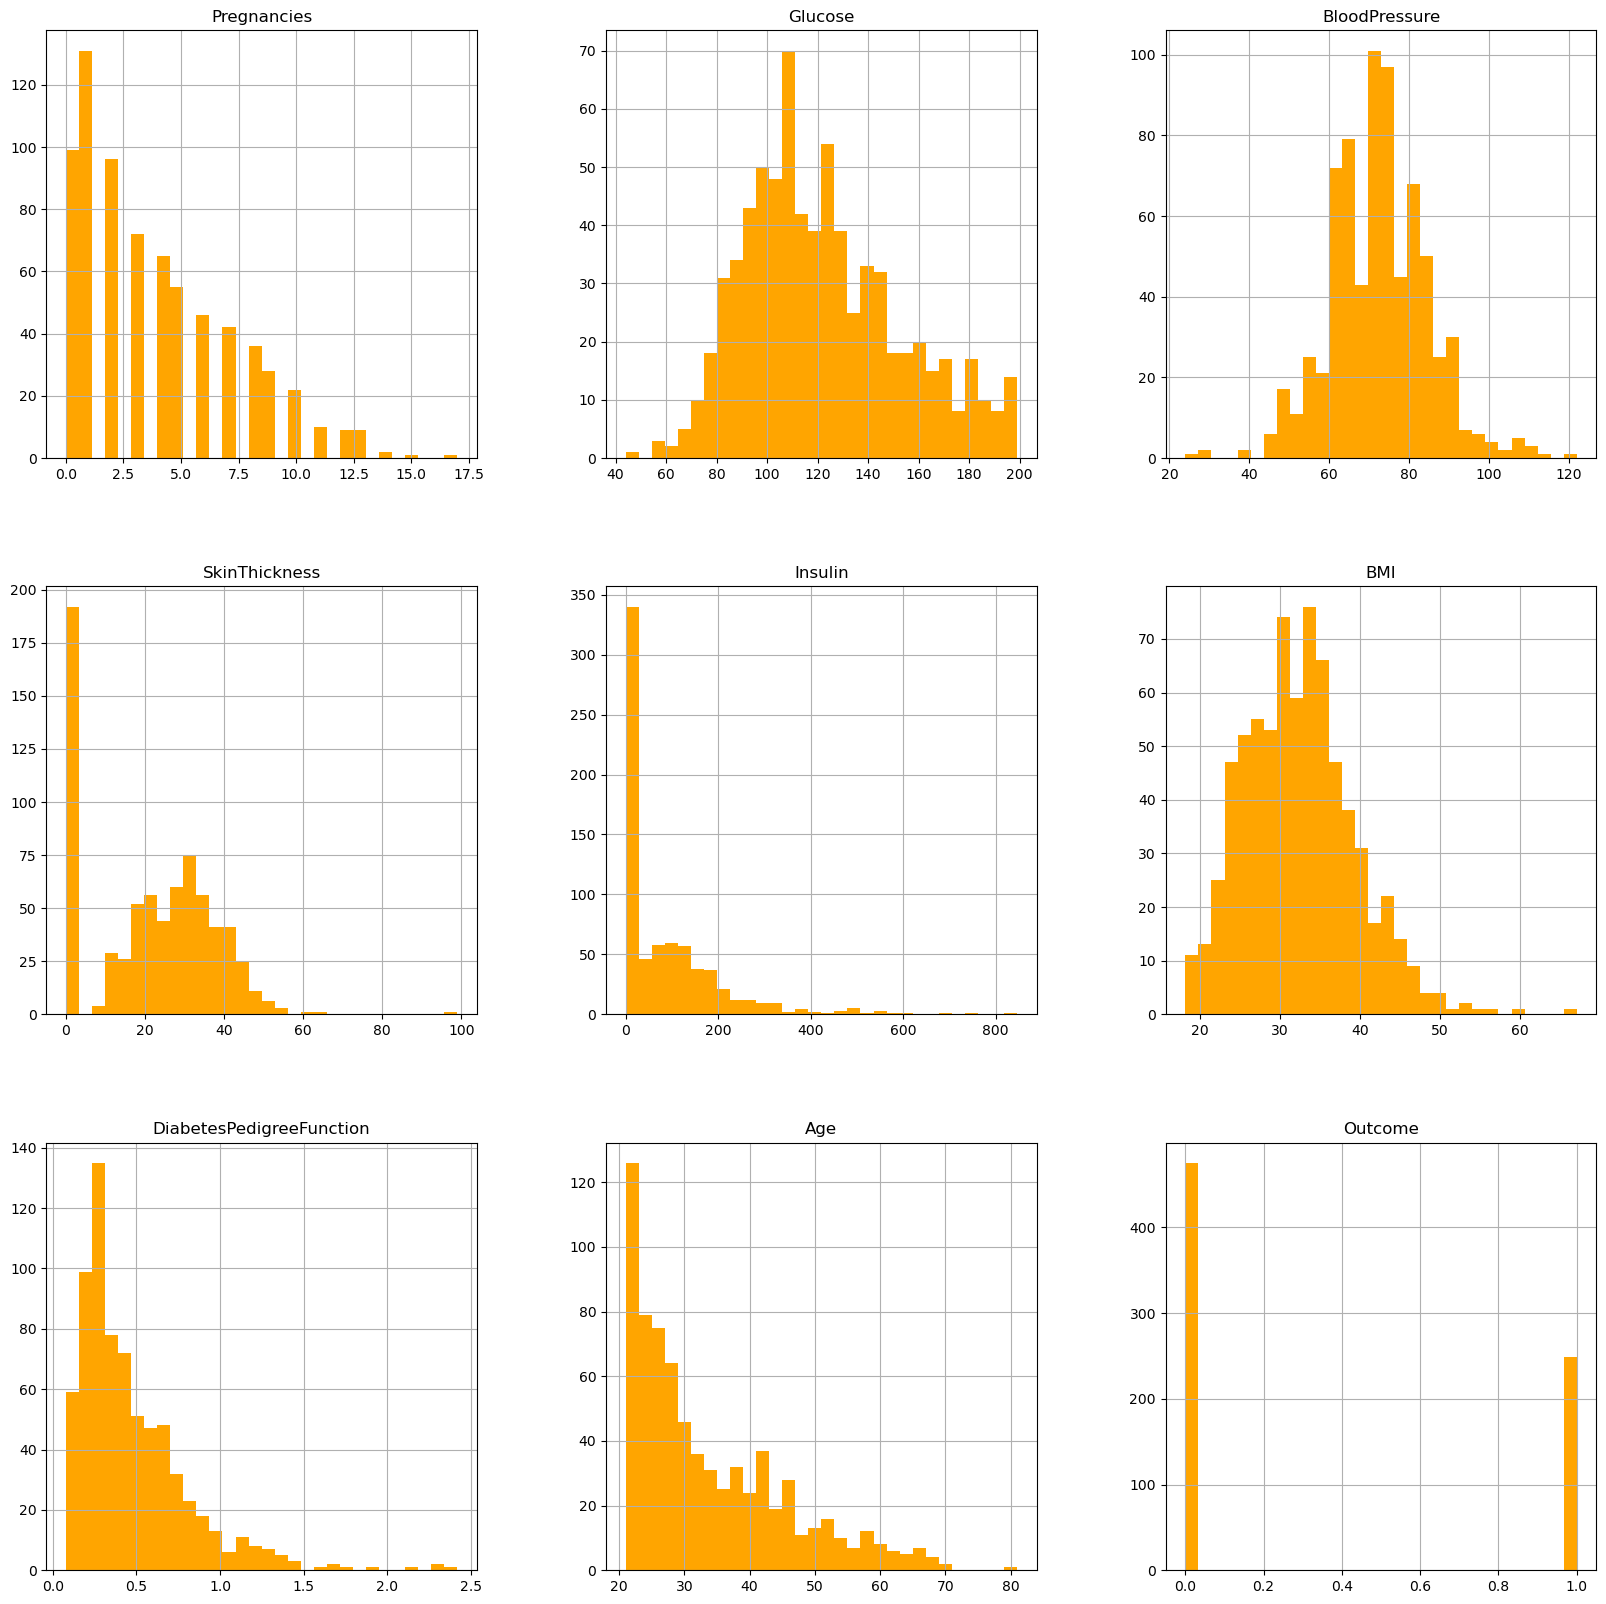

In [6]:
df = df[(df["BloodPressure"] > 0) & (df["BMI"] > 0) & (df["Glucose"] > 0)]

df.hist(bins = 30, figsize = (20, 20), color = 'orange')

plt.show()

In [7]:
# Check the number of records left after cleaning
df.shape

(724, 9)

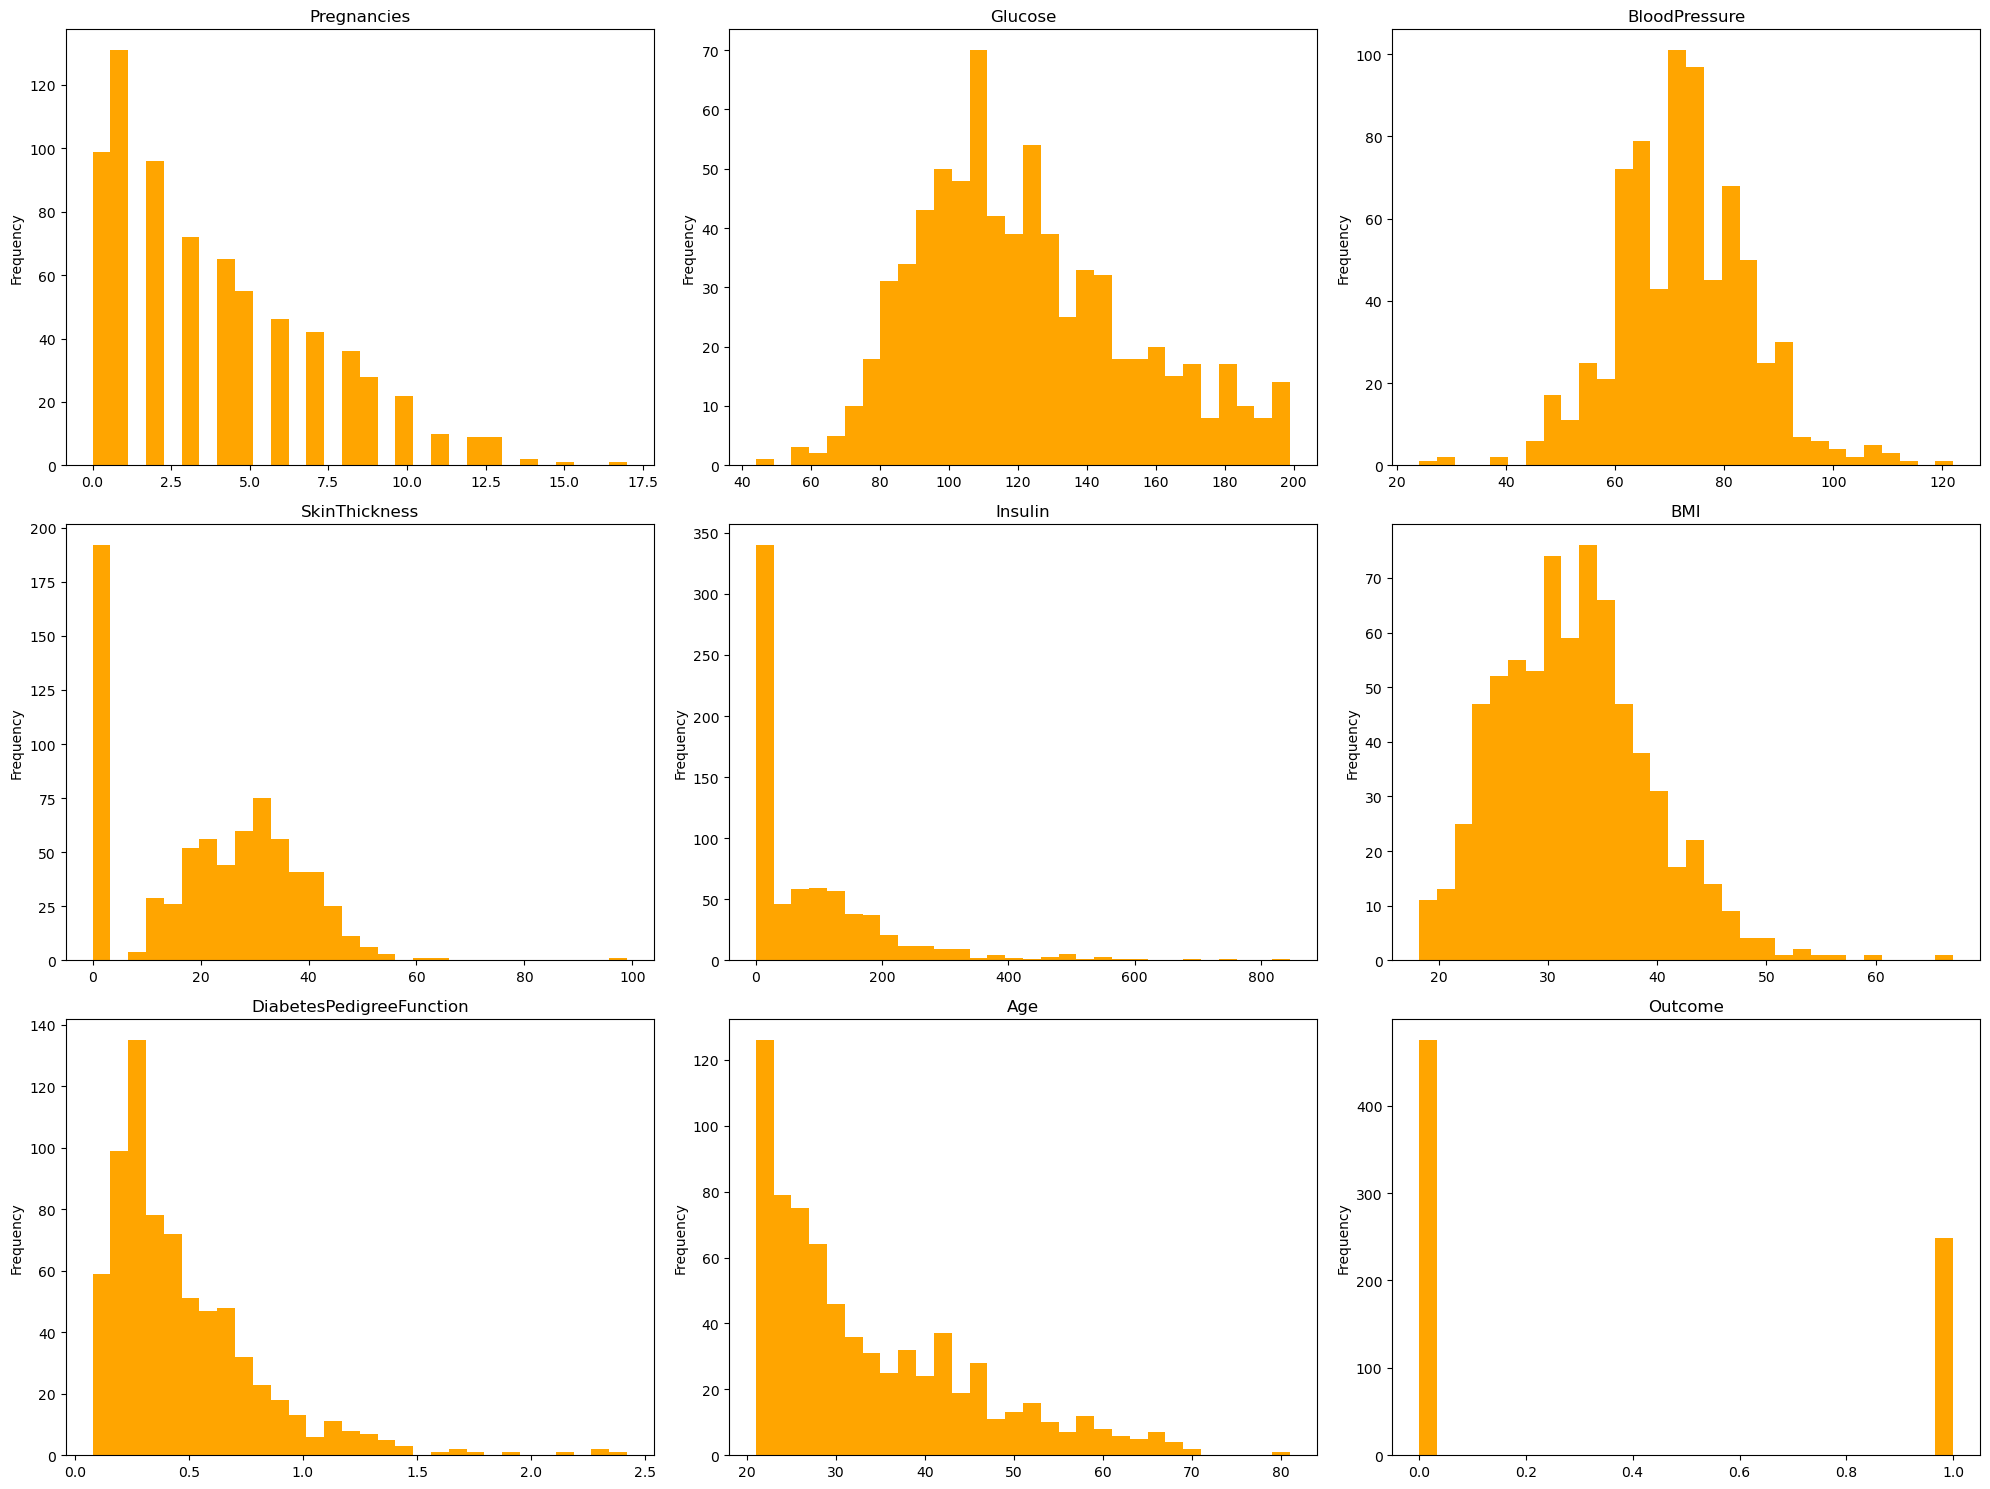

In [8]:
## Export the histograms to an image file
# Determine the number of rows and columns for subplots
num_cols = 3
num_rows = -(-len(df.columns) // num_cols)  # Ceiling division to ensure enough rows

# Create a figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histogram for each column
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    df[col].plot(kind='hist', bins=30, ax=ax, color='orange')
    ax.set_title(col)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('img/histograms_diabetes.png')

# Show the plot
plt.show()

In [9]:
# Create a correlation matrix

corr_matrix = df.corr()

corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.134915       0.209668      -0.095683   
Glucose                      0.134915  1.000000       0.223331       0.074381   
BloodPressure                0.209668  0.223331       1.000000       0.011777   
SkinThickness               -0.095683  0.074381       0.011777       1.000000   
Insulin                     -0.080059  0.337896      -0.046856       0.420874   
BMI                          0.012342  0.223276       0.287403       0.401528   
DiabetesPedigreeFunction    -0.025996  0.136630      -0.000075       0.176253   
Age                          0.557066  0.263560       0.324897      -0.128908   
Outcome                      0.224417  0.488384       0.166703       0.092030   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.080059  0.012342                 -0.025996   
Glucose                   0.337896  0.223276                  0.136630   
BloodPressure            -0.046856  0.287403                 -0.000075   
SkinThickness             0.420874  0.401528                  0.176253   
Insulin                   1.000000  0.191831                  0.182656   
BMI                       0.191831  1.000000                  0.154858   
DiabetesPedigreeFunction  0.182656  0.154858                  1.000000   
Age                      -0.049412  0.020835                  0.023098   
Outcome                   0.145488  0.299375                  0.184947   

                               Age   Outcome  
Pregnancies               0.557066  0.224417  
Glucose                   0.263560  0.488384  
BloodPressure             0.324897  0.166703  
SkinThickness            -0.128908  0.092030  
Insulin                  -0.049412  0.145488  
BMI                       0.020835  0.299375  
DiabetesPedigreeFunction  0.023098  0.184947  
Age                       1.000000  0.245741  
Outcome                   0.245741  1.000000

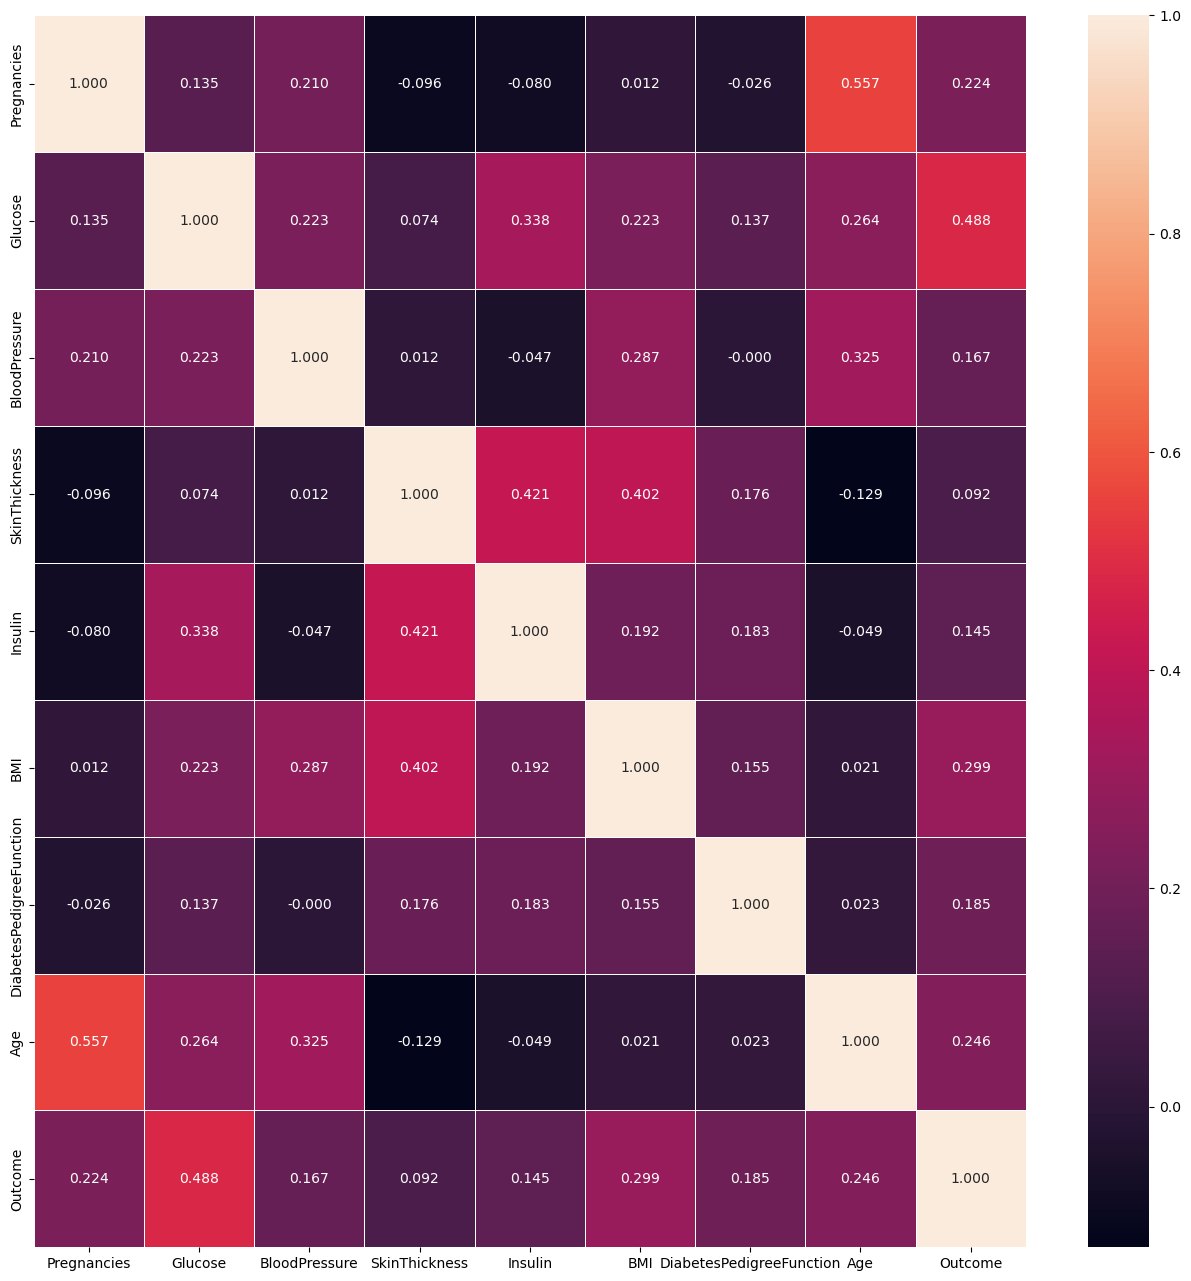

In [10]:
# Plot the correlation matrix

plt.figure(figsize = (16, 16))

_ = sns.heatmap(corr_matrix, annot = True, fmt = ".3f", linewidths = .5)

plt.show()

fig = _.get_figure()

fig.savefig('img/corr_mat_diabetes.png')

There are significant correlations between BMI and skin thickness, skin thickness and insulin, glucose and insulin, glucose and outcome, blood presure and age and blood presure and bmi. 

# Split the data into training and test sets

In [11]:
# split the dataframe into target and features

y = df["Outcome"] # target
X = df.drop(columns = ["Outcome"]) # features

# Verify that the split was performed correctly
print(X.shape)
print(y.shape)

(724, 8)
(724,)


In [12]:
# split the labels and features into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

# Verify that the split was performed correctly
print('Training set')
print(X_train.shape)
print(y_train.shape)
print()
print('Testing set')
print(X_test.shape)
print(y_test.shape)
print()

Training set
(579, 8)
(579,)

Testing set
(145, 8)
(145,)



In [13]:
# Verify that the index has been shuffled
print(X.index)
print()
print(X_train.index)

Index([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,
       ...
       758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
      dtype='int64', length=724)

Index([271, 429, 477, 148,  39, 576, 617,  83, 618, 216,
       ...
       628, 105, 250, 537, 620, 119, 334, 727, 482, 724],
      dtype='int64', length=579)


# Train an XGBoost Classifier in scikit-learn

In [14]:
# import the classifier

from xgboost import XGBClassifier

In [15]:
xgb_classifier = XGBClassifier(objective = 'binary:logistic', 
                               eval_metric = 'error', 
                               learning_rate = 0.1,
                               max_depth = 8,
                               alpha = 25,
                               n_estimators = 100 
                               )

xgb_classifier.fit(X_train, y_train)

XGBClassifier(alpha=25, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

# Test the model

In [16]:
# predict the performance score of the trained model using the testing dataset

result = xgb_classifier.score(X_test, y_test)
print("Accuracy: {}".format(result))

Accuracy: 0.7586206896551724


In [17]:
# make predictions on the test data

y_predict = xgb_classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [18]:
# print the performance report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        95
           1       0.78      0.42      0.55        50

    accuracy                           0.76       145
   macro avg       0.77      0.68      0.69       145
weighted avg       0.76      0.76      0.74       145



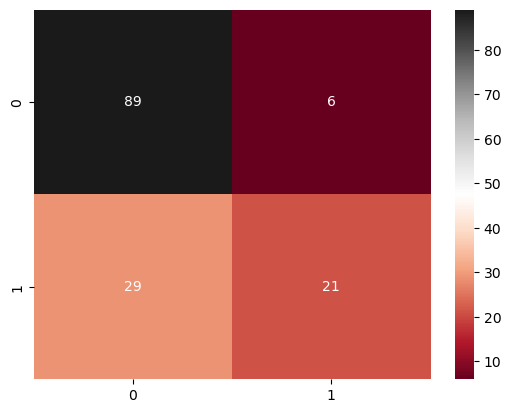

In [19]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True, cmap = 'RdGy')

plt.savefig('img/conf_mat_diabetes.png')


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

In [21]:
selected_features = SelectKBest(chi2, k = 7).fit(X_train, y_train)

print('Score List: ', selected_features.scores_)
print()
print('Feature list: ', X_train.columns)

Score List:  [  54.74146102 1079.04188538   38.25432668  115.23908768 2364.91877118
   80.03689299    5.97908954  160.57987936]

Feature list:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


[0]	validation_0-error:0.34370	validation_1-error:0.34483
[1]	validation_0-error:0.34370	validation_1-error:0.34483
[2]	validation_0-error:0.34370	validation_1-error:0.34483
[3]	validation_0-error:0.34370	validation_1-error:0.34483
[4]	validation_0-error:0.34370	validation_1-error:0.34483
[5]	validation_0-error:0.34370	validation_1-error:0.34483
[6]	validation_0-error:0.34370	validation_1-error:0.34483
[7]	validation_0-error:0.34370	validation_1-error:0.34483
[8]	validation_0-error:0.34370	validation_1-error:0.34483
[9]	validation_0-error:0.34370	validation_1-error:0.34483
[10]	validation_0-error:0.34370	validation_1-error:0.34483
[11]	validation_0-error:0.34370	validation_1-error:0.34483
[12]	validation_0-error:0.34370	validation_1-error:0.34483
[13]	validation_0-error:0.34370	validation_1-error:0.34483
[14]	validation_0-error:0.34370	validation_1-error:0.34483
[15]	validation_0-error:0.34370	validation_1-error:0.34483
[16]	validation_0-error:0.34370	validation_1-error:0.34483
[17]	va

<Axes: >

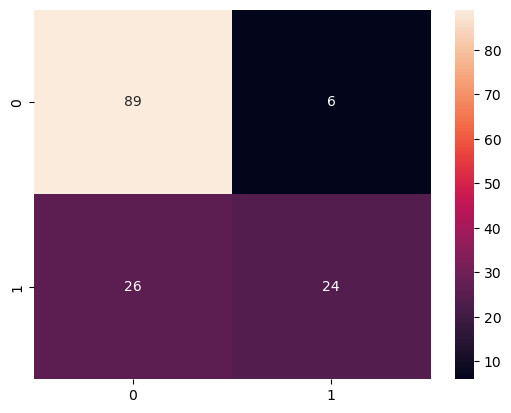

In [108]:
##### X_train_2 = selected_features.transform(X_train)

X_test_2 = selected_features.transform(X_test)

evalset = [(X_train_2, y_train), (X_test_2, y_test)]

xgb_classifier_2 = XGBClassifier(objective = 'binary:logistic', 
                                 eval_metric = 'error', 
                                 learning_rate = 0.01,
                                 max_depth = 8,
                                 alpha = 17,
                                 n_estimators = 300,                
                                 min_child_weight = 1,                                 
                                 scale_pos_weight = 1,
                                 use_label_encoder = False,
                                 seed = 21).fit(X_train_2, y_train, eval_set = evalset)

result2 = xgb_classifier_2.score(X_test_2, y_test)
print("Accuracy: {}".format(result2))

print()
print('Accuracy is: ', accuracy_score(y_test, xgb_classifier_2.predict(X_test_2)))
print()

cm_2 = confusion_matrix(y_test, xgb_classifier_2.predict(X_test_2))

sns.heatmap(cm_2, annot = True, fmt = 'd')

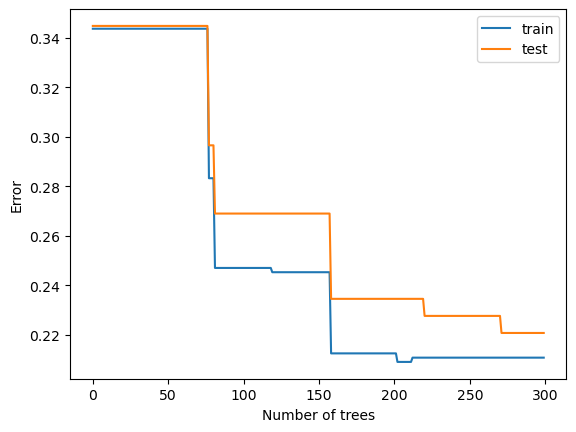

In [109]:
results = xgb_classifier_2.evals_result()

plt.plot(results['validation_0']['error'], label = 'train')
plt.plot(results['validation_1']['error'], label = 'test')

plt.xlabel('Number of trees')
plt.ylabel('Error')

plt.legend()

plt.show()

In [102]:
print(result2)

0.7793103448275862
